# 1. Introduction

With the acceleration of urbanization, traditional transportation methods are facing serious challenges, such as traffic congestion, air pollution, and energy consumption(Warlina and Hermawan, 2020). Based on this background, bike sharing systems, as an emerging and environmentally friendly mode of transportation, are developing rapidly around the world and have become an important part of urban sustainable transportation systems. This system not only provides a convenient, efficient and low-carbon travel option, but also greatly promotes the transformation of urban transportation patterns.<br/>

In London, as residents and tourists pursue healthy lifestyles and urban traffic congestion intensifies (Chibwe et al., 2023), the electronic bike sharing system has shown its unique advantages. The London government and related enterprises have promoted the implementation of the e-bike sharing program, aiming to relieve traffic pressure in the central area, reduce carbon emissions, and improve citizens' quality of life. Therefore, studying the demand for shared bikes in London will not only help optimize the existing transportation resource allocation, but also provide scientific basis for the formulation of future transportation policies.<br/>

This project aims to explore the impact of different weather conditions and time periods on bike usage by analyzing usage data of London's e-bike sharing system. These data will help us better understand the usage patterns and citizen needs of shared bikes, and further promote the optimization and development of shared bike systems.<br/>

# 2. Literature Review

Some data-driven quantitative research on London’s shared bike system has yielded significant results. From a model perspective, Rylander et al. (2023) used the K-means algorithm that combines geographical data segmentation and polynomial regression to model and predict the demand for shared bikes. They believe that an accurate demand prediction model can help optimize bike configurations between stations, thereby Improve operational efficiency and user satisfaction.<br/>

For practical reasons, Heydari et al. (2023) used a generalized negative binomial model to deal with overdispersion in the data, which allowed them to assess the impact of non-weather factors and weather-related factors on daily bike rental demand. They highlight the need for policy interventions that take into account economic conditions and weather predictability to increase the utility and attractiveness of bike-sharing systems.<br/>

Based on previous research experience, this project uses climate factors and time as the main reference characteristics to conduct a visual analysis of the impact of different factors on the demand for shared bikes, and predicts the demand for shared bikes in London through a decision tree model to help urban planners , policymakers and bike-sharing operators to improve service efficiency and user experience in urban environments.<br/>

# 3. Research question

Based on the above background and analysis of related studies, the research questions of this project are as follows:<br/>

1. How do weather and time factors specifically affect the demand for shared bikes?<br/>

2. How can these effects be effectively visualized to help decision-makers with non-technical backgrounds understand patterns and predictions?<br/>

3. How well can machine learning models predict demand for shared bikes, taking into account weather and time variables?<br/>

### Library required

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Presentation of data

### Data Loading

In [2]:
#Data loading
df = pd.read_csv(
  "london_merged.csv", 
  parse_dates=True, 
  index_col="timestamp"
)

In [3]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.shape

(17414, 9)

### Data instruction

With the data loaded, we can find that the data set consists of 17,414 pieces of data, each with 9 columns, covering the number of shared bike rentals in the two years from 4th January 2015 to 4th January 2017. Each piece of data is accurate to the hour. Here is an explanation of what each column in the data means, which will help with understanding the different features in subsequent analyses.<br/>

"timestamp" - timestamp field for grouping the data<br/>
"cnt" - the count of a new bike shares<br/>
"t1" - real temperature in C<br/>
"t2" - temperature in C "feels like"<br/>
"hum" - humidity in percentage<br/>
"wind_speed" - wind speed in km/h<br/>
"weather_code" - category of the weather<br/>
"is_holiday" - boolean field - 1 holiday / 0 non holiday<br/>
"is_weekend" - boolean field - 1 if the day is weekend<br/>
"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.<br/>
"weathe_code" - <br/>
1 = Clear  <br/>
2 = scattered clouds / few clouds <br/>
3 = Broken clouds <br/>
4 = Cloudy <br/>
7 = Rain/ light Rain shower/ Light rain <br/>
10 = rain with thunderstorm <br/>
26 = snowfall <br/>
94 = Freezing Fog <br/>

### Data cleaning

In [5]:
#Extract time factors from timestamp
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In order to better analyse features and visualization, 4 time factors ('hour', 'day_of_month', 'day_of_week', 'month') are extracted from the timestamp and merged into the original data set.

In [6]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1


cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
hour            0
day_of_month    0
day_of_week     0
month           0
dtype: int64


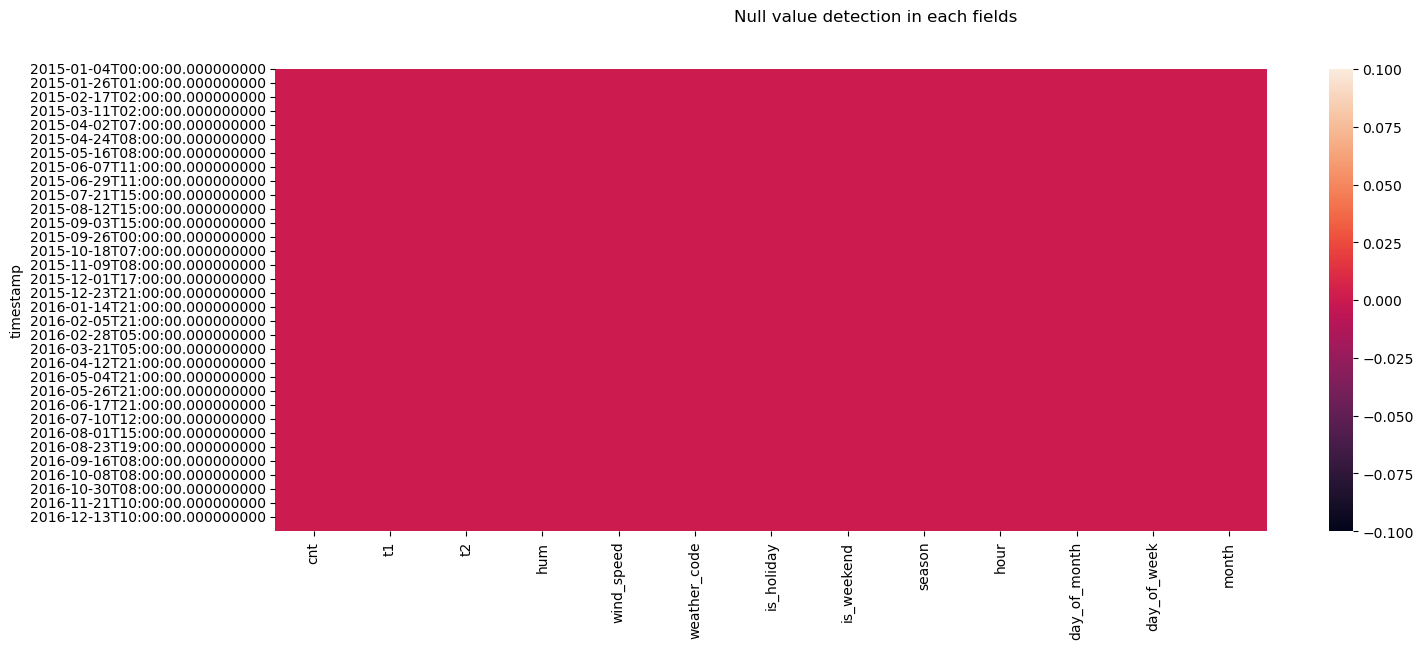

In [7]:
#Check if there is a null value
plt.figure(figsize=(16,6))
print(df.isnull().sum())
sns.heatmap(df.isnull())
plt.suptitle("Null value detection in each fields")
plt.show()

It can be directly seen from the heat map that each grid presents the same red color (the color corresponding to the quantity 0), indicating that the data set does not have null values.

### Data analysis

In [8]:
#Sort by day
df_by_day1=df.resample('D').sum()
df_by_day1.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0,276,96,144,24
2015-01-05,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0,276,120,0,24
2015-01-06,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0,276,144,24,24
2015-01-07,21064,171.5,103.5,1796.5,454.5,60.0,0.0,0.0,69.0,257,161,46,23
2015-01-08,15601,234.0,187.0,1903.5,491.5,84.0,0.0,0.0,72.0,276,192,72,24


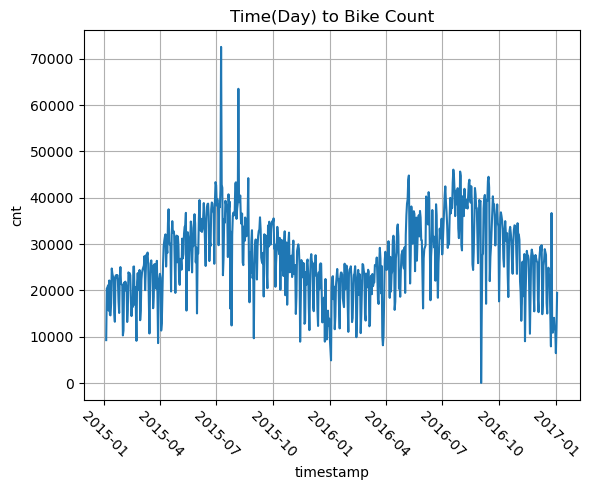

In [9]:
# Plot
sns.lineplot(x=df_by_day1.index,y=df_by_day1['cnt'],data=df_by_day1)
plt.xticks(rotation=-45)
plt.title("Time(Day) to Bike Count")
plt.grid(True)
plt.show()

This graph visualizes the demand and changing trends of shared bikes by each day. 

In [10]:
# Sort by month
df_by_month = df.resample('M').sum()
df_by_month.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-31,546639,4101.0,2255.5,51005.00,12502.00,2211.0,0.0,192.0,2013.0,7709,11753,2014,671
2015-02-28,543594,3721.5,1868.0,51950.00,9873.50,2409.0,0.0,192.0,2013.0,7707,9734,2015,1342
2015-03-31,695934,6093.5,4558.5,51832.25,12938.25,1940.0,0.0,215.0,0.0,8540,11751,2174,2217
2015-04-30,831582,7873.0,7112.5,48468.00,10988.50,1642.0,48.0,191.0,0.0,8270,11156,2131,2876
2015-05-31,895413,10091.5,9803.5,47939.00,14268.50,1900.0,48.0,240.0,0.0,8556,11904,2376,3720


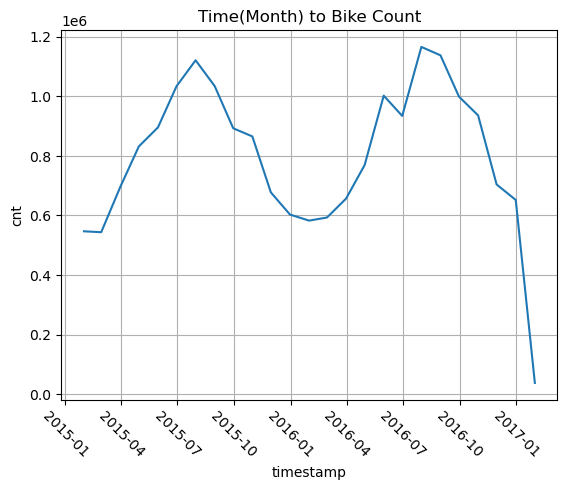

In [11]:
# Plot
sns.lineplot(x=df_by_month.index, y="cnt", data=df_by_month)
plt.xticks(rotation=-45)
plt.title("Time(Month) to Bike Count")
plt.grid(True)
plt.show()

Since the 'day' unit is too close to view the chart, here use the monthly unit to view it. We can see that there is obvious periodicity. The demand is more in July and August, and less in winter so it is highly correlated with the weather season.

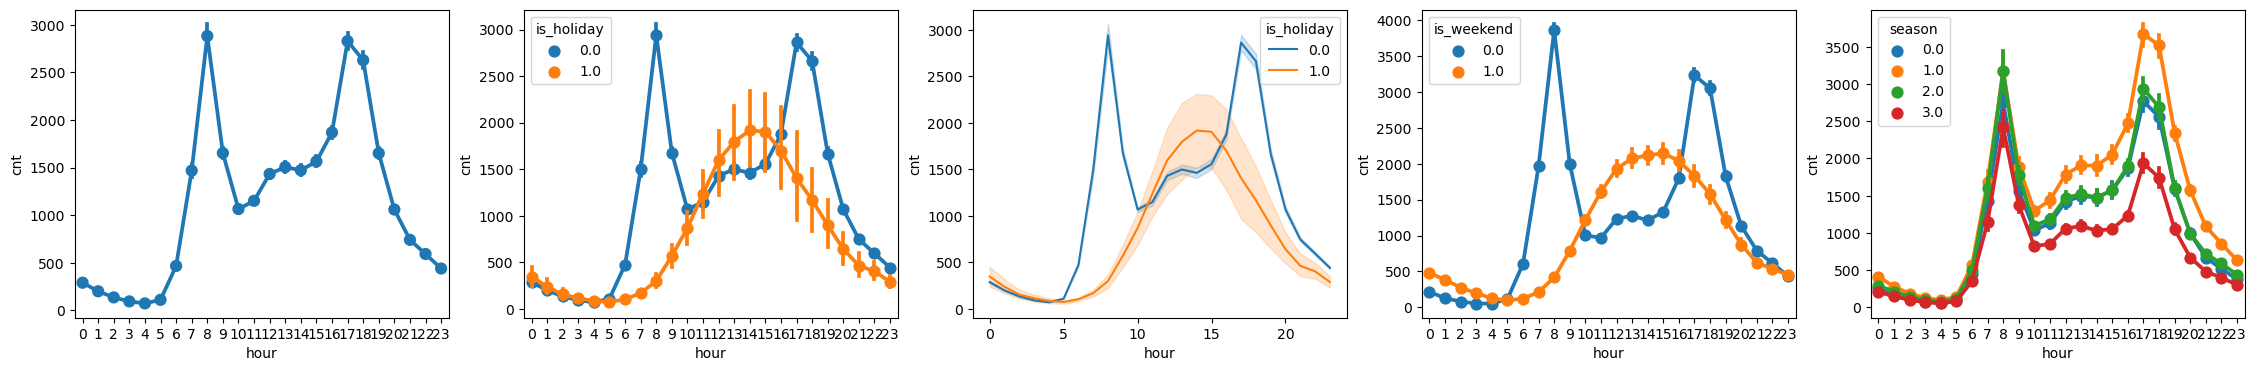

In [12]:
# Plot
fig,(ax1, ax2, ax3, ax4, ax5)= plt.subplots(ncols=5)
fig.set_size_inches(28, 4)

sns.pointplot(data=df, x='hour', y='cnt', ax=ax1)
sns.pointplot(data=df, x='hour', y='cnt', hue='is_holiday', ax=ax2)
sns.lineplot(data=df, x='hour',y='cnt',hue='is_holiday',color="r",ax=ax3)
sns.pointplot(data=df, x='hour', y='cnt', hue='is_weekend', ax=ax4)
sns.pointplot(data=df, x='hour', y='cnt', hue='season',ax=ax5)
plt.show()

Figure 1:
This is a simple trend graph showing the hourly demand for bikes without any additional conditions. The figure shows two obvious peak hours, corresponding to the morning and evening get off work hours.<br/>

Figure 2:
Shown is the difference in demand between holidays (orange) and non-holidays (blue). The demand on holidays is significantly lower than that on non-holidays, and there is no obvious commuting peak.<br/>

Figure 3:
Average demand and confidence intervals for holidays and weekdays were compared. Demand on holidays (orange line) is flatter with no obvious peaks, while the curve on non-holidays (blue line) is bimodal.<br/>

Figure 4:
Weekend (orange) and non-weekend (blue) bike demand is compared. Weekend demand was overall lower than average and peak times were later, possibly reflecting people's more flexible travel schedules over the weekend.<br/>

Figure 5:
The impact of different seasons (0.0-spring, 1.0-summer, 2.0-autumn, 3.0-winter) on bike demand is shown. We can see differences in demand patterns in different seasons, with high usage in summer, autumn, spring and low usage in winter.<br/>

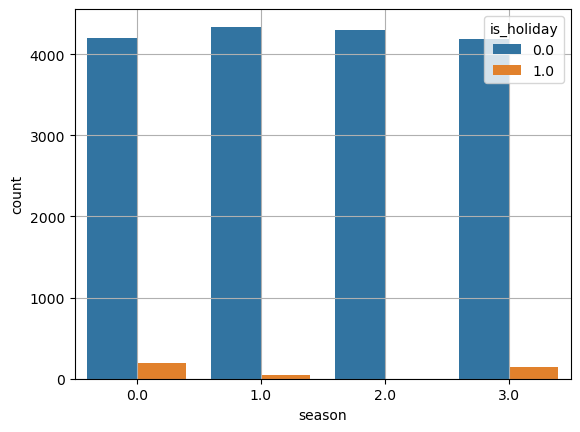

In [13]:
# Plot
fig.set_size_inches(10, 8)
sns.countplot(data=df,hue=df.is_holiday,x=df.season)
plt.grid(True)
plt.show()

This histogram shows the impact of holidays (marked by is_holiday, 0.0 represents non-holiday, 1.0 represents holiday) on the demand for shared bikes (count) in different seasons (0.0-spring, 1.0-summer, 2.0-autumn, 3.0-winter). Across all four seasons, bike demand is significantly higher during non-holidays than during holidays. Demand during the holidays is very low across all seasons, suggesting that the holidays may not be a peak time for bike share use.

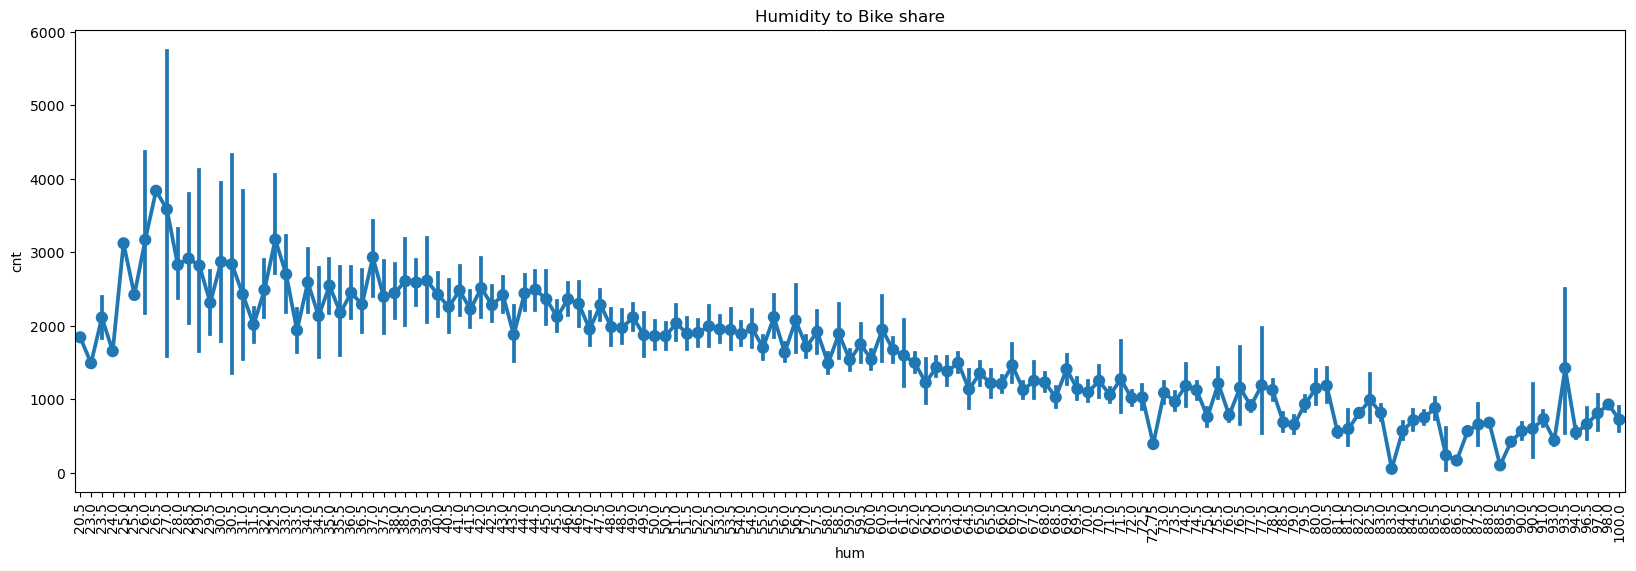

In [14]:
# Plot
plt.figure(figsize=(20,6))
sns.pointplot(data=df,x=df.hum,y=df.cnt)
plt.xticks(rotation=90)
plt.title("Humidity to Bike share")
plt.show()

It can be seen that within the humidity range from 20.5 to 26, the use of shared bikes increases with the increase in humidity. As the humidity further increases, the demand for shared bikes shows a slowly decreasing trend.

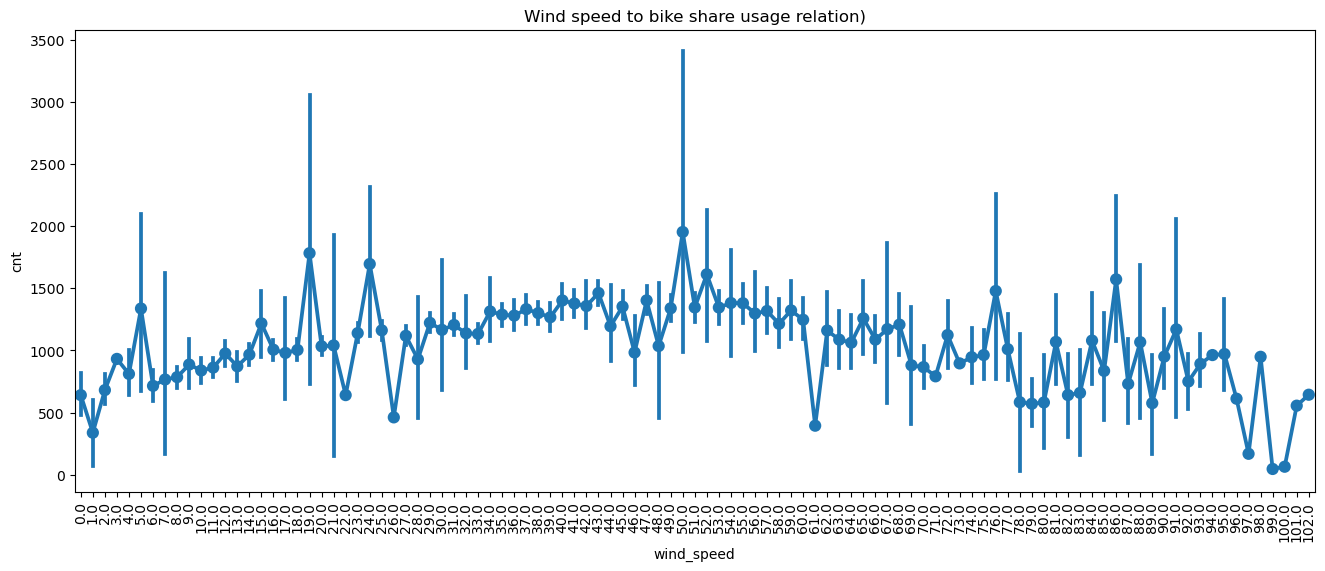

In [15]:
# Plot
plt.figure(figsize=(16,6))
sns.pointplot(data=df,x=df.wind_speed,y=df.cnt)
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xticks(rotation=90)
plt.title("Wind speed to bike share usage relation)")
plt.show()

At lower wind speeds, bike usage seems to fluctuate. The fluctuations in usage appear to decrease as wind speed increases, but there are still several peaks indicating sudden increases in bike usage at some higher wind speeds. It can be concluded that wind speed has a certain impact on the use of shared bikes, especially in extreme situations. However, due to the large variability, more analysis is needed to determine the exact impact of changes in wind speed on bike usage.

In order to analyze in more detail the impact of the comprehensive factors caused by climate and time on the usage of shared bikes, different levels of wind speed and humidity are divided here, and the changes in the usage of shared bikes are visualized in hourly units.

In [16]:
df_hum=df.copy()
for idx in df_hum.index:
  if(df_hum.loc[idx]['hum']>=20.0) & (df_hum.loc[idx]['hum']<=30.0):
    df_hum.loc[idx,'hum']='level-1'
  elif(df_hum.loc[idx]['hum']>30.0) & (df_hum.loc[idx]['hum']<=40.0):
    df_hum.loc[idx,'hum']='level-2'
  elif(df_hum.loc[idx]['hum']>40.0) & (df_hum.loc[idx]['hum']<=50.0):
    df_hum.loc[idx,'hum']='level-3'
  elif(df_hum.loc[idx]['hum']>50.0) & (df_hum.loc[idx]['hum']<=60.0):
    df_hum.loc[idx,'hum']='level-4'
  elif(df_hum.loc[idx]['hum']>60.0) & (df_hum.loc[idx]['hum']<=70.0):
    df_hum.loc[idx,'hum']='level-5'
  elif(df_hum.loc[idx]['hum']>70.0) & (df_hum.loc[idx]['hum']<=80.0):
    df_hum.loc[idx,'hum']='level-6'
  elif(df_hum.loc[idx]['hum']>80.0) & (df_hum.loc[idx]['hum']<=90.0):
    df_hum.loc[idx,'hum']='level-7'
  elif(df_hum.loc[idx]['hum']>90.0):
    df_hum.loc[idx,'hum']='level-8'


The humidity here is divided into 8 levels. The higher the level, the higher the humidity.

In [17]:
df_wind=df.copy()
for idx in df_wind.index:
  if(df_wind.loc[idx]['wind_speed']>=0.0) & (df_wind.loc[idx]['wind_speed']<=5.0):
    df_wind.loc[idx,'wind_speed']='level-1'
  elif(df_wind.loc[idx]['wind_speed']>5.0) & (df_wind.loc[idx]['wind_speed']<=10.0):
    df_wind.loc[idx,'wind_speed']='level-2'
  elif(df_wind.loc[idx]['wind_speed']>10.0) & (df_wind.loc[idx]['wind_speed']<=15.0):
    df_wind.loc[idx,'wind_speed']='level-3'
  elif(df_wind.loc[idx]['wind_speed']>15.0) & (df_wind.loc[idx]['wind_speed']<=20.0):
    df_wind.loc[idx,'wind_speed']='level-4'
  elif(df_wind.loc[idx]['wind_speed']>20.0) & (df_wind.loc[idx]['wind_speed']<=25.0):
    df_wind.loc[idx,'wind_speed']='level-5'
  elif(df_wind.loc[idx]['wind_speed']>25.0) & (df_wind.loc[idx]['wind_speed']<=30.0):
    df_wind.loc[idx,'wind_speed']='level-6'
  elif(df_wind.loc[idx]['wind_speed']>30.0) & (df_wind.loc[idx]['wind_speed']<=35.0):
    df_wind.loc[idx,'wind_speed']='level-7'
  elif(df_wind.loc[idx]['wind_speed']>35.0) & (df_wind.loc[idx]['wind_speed']<=40.0):
    df_wind.loc[idx,'wind_speed']='level-8'
  elif(df_wind.loc[idx]['wind_speed']>40.0) & (df_wind.loc[idx]['wind_speed']<=45.0):
    df_wind.loc[idx,'wind_speed']='level-9'
  elif(df_wind.loc[idx]['wind_speed']>45.0) & (df_wind.loc[idx]['wind_speed']<=50.0):
    df_wind.loc[idx,'wind_speed']='level-10'
  elif(df_wind.loc[idx]['wind_speed']>50.0):
    df_wind.loc[idx,'wind_speed']='level-11'

The wind speed here is divided into 11 levels. The higher the level, the higher the wind speed.

Text(0.5, 1.0, 'Hourly Counts by Wind speed')

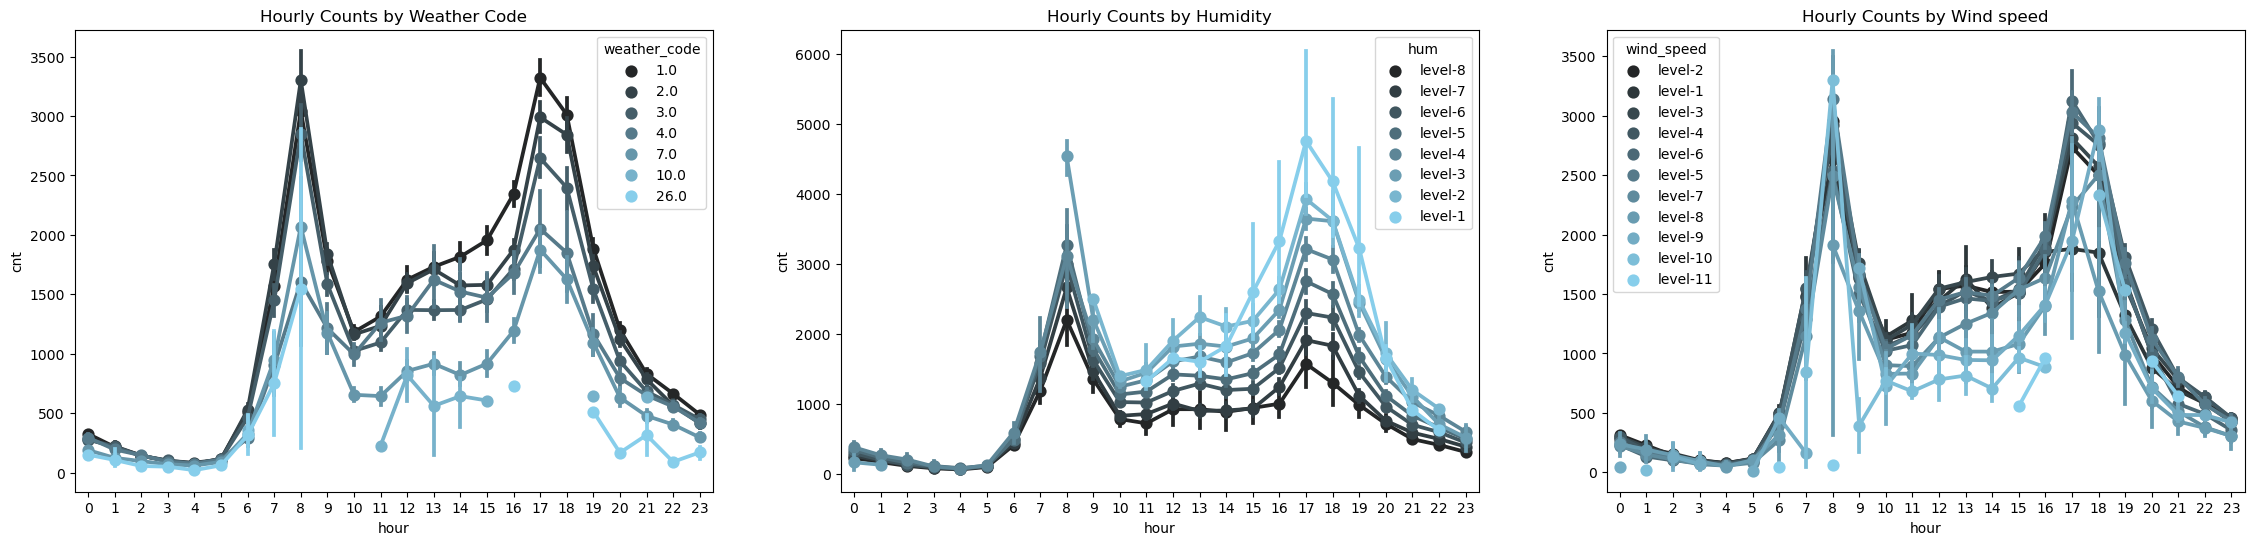

In [18]:
# Plot
fig,(ax1, ax2,ax3)= plt.subplots(ncols=3)
fig.set_size_inches(28, 6)
sns.pointplot(x=df.hour,y=df.cnt,data=df,hue=df.weather_code,color='skyblue',ax=ax1)
sns.pointplot(x=df_hum.hour,y=df_hum.cnt,data=df_hum,hue=df_hum.hum,color='skyblue',ax=ax2)
sns.pointplot(x=df_wind.hour,y=df_wind.cnt,data=df_wind,hue=df_wind.wind_speed,color='skyblue',ax=ax3)
ax1.set_title('Hourly Counts by Weather Code')
ax2.set_title('Hourly Counts by Humidity')
ax3.set_title('Hourly Counts by Wind speed')

Figure 1 (hour count vs. weather type):<br/>
Sunny (1):<br/>
In clear weather conditions, bike use peaks during morning and evening rush hours, reflecting typical commuting patterns. This shows that sunny weather has a positive impact on cycling.<br/>

Few clouds/scattered clouds (2) and mostly clouds (3):<br/>
Bike use declined slightly as the weather turned from sunny to cloudy, but maintained similar daily use patterns, especially during peak commute times.<br/>

Cloudy day (4):<br/>
On cloudy days, bike usage is further reduced, especially during the evening rush hour. This may indicate that cloudy days with fewer clouds have a greater impact on people's willingness to ride.<br/>

Rainy days (7) and thundershowers (10):<br/>
Rainy days and thundershowers further reduced bike use, especially during the expected morning and evening rush hours. Rain and thunder may cause people to avoid riding due to safety and comfort concerns.<br/>

Snowfall (26):<br/>
Bike usage drops sharply due to snowfall. Snow conditions often make riding difficult and dangerous, greatly reducing bike use.<br/>

Freezing Fog (94):<br/>
In extreme weather conditions, such as freezing fog, the bikes get almost zero use. This may be because visibility is extremely low and roads may be icy, making riding a bike very dangerous.<br/>

Figure 2 (hour count vs. humidity):<br/>
In drier conditions, bikes see higher usage, especially during peak times. As humidity levels increase, usage decreases, especially during the evening hours.<br/>

Figure 3 (hour count vs. wind speed):<br/>
Under lower wind speed conditions, bike usage is higher during rush hour. As wind speed levels increase, bike usage decreases, and the decrease in usage during peak hours is more pronounced.<br/>

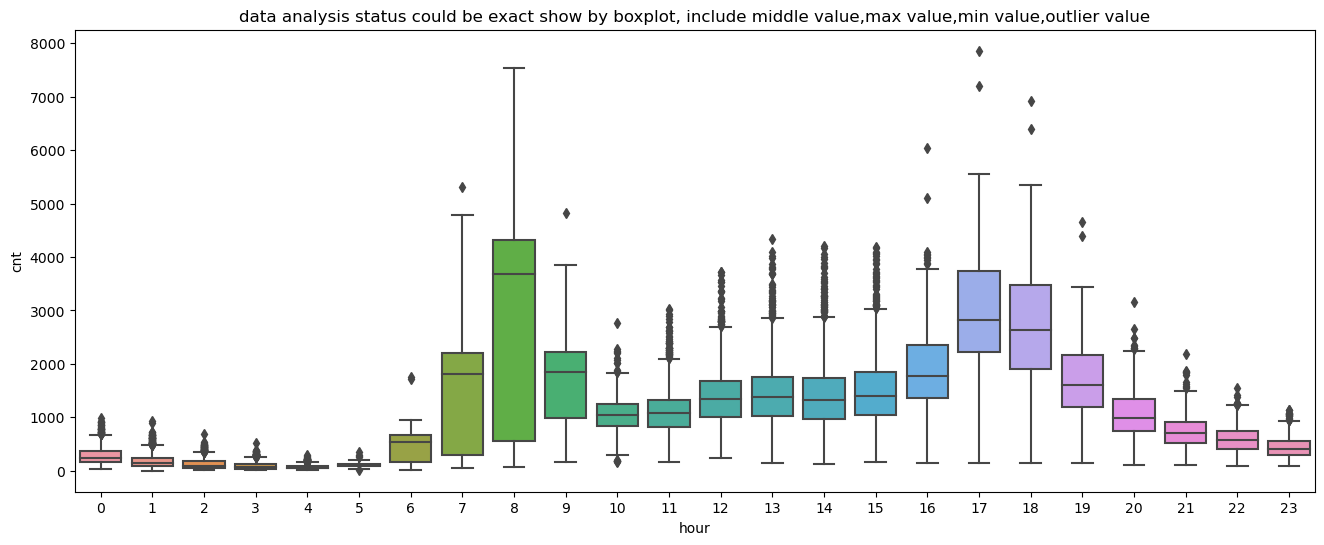

In [19]:
# Plot
plt.figure(figsize=(16,6))
sns.boxplot(data=df,x=df["hour"],y=df.cnt)
plt.title("hour to count")
plt.show()

During the morning and evening peak hours (usually 7:00 -9:00  and 17:00 - 19:00), the median bike usage is significantly higher than other time points. This may reflect the popularity of bike sharing during commuting hours. During off-peak hours (such as late night and early morning), the median usage is lower and the data is relatively tightly distributed, indicating that usage during these times is relatively stable and low.

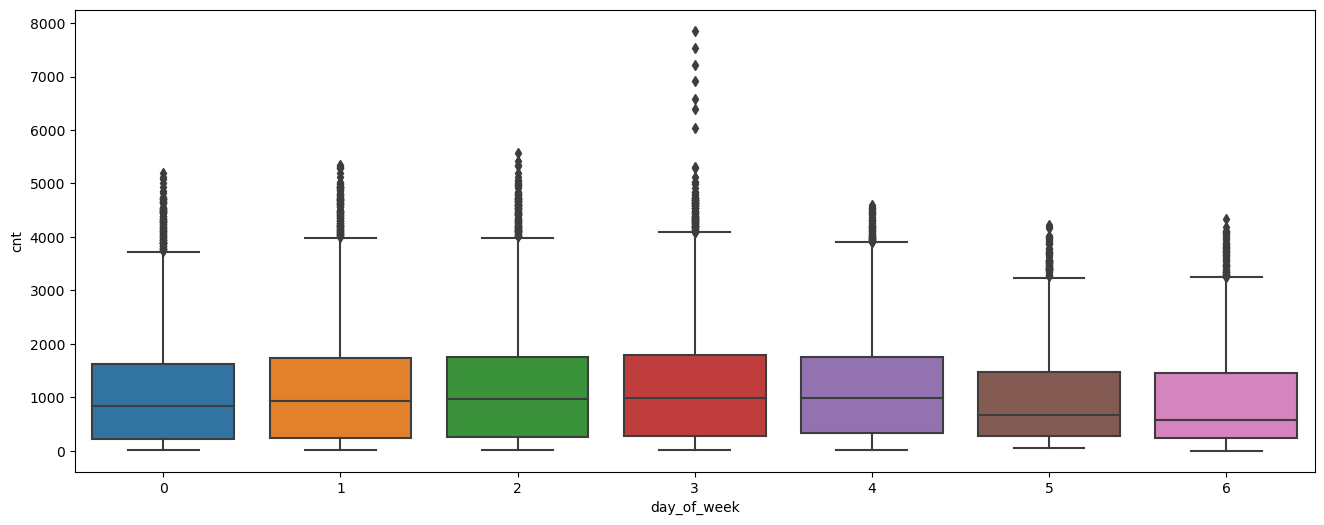

In [20]:
# Plot
plt.figure(figsize=(16,6))
sns.boxplot(data=df,x=df["day_of_week"],y=df.cnt)
plt.title("day_of_week to count")
plt.show()

The median and interquartile range on some days of the week (weekdays) are significantly higher than on weekends, suggesting that commuting can significantly increase bike sharing usage. Weekend data exhibits lower medians but still has some high outliers, which may reflect increased intermittent use due to leisure activities.

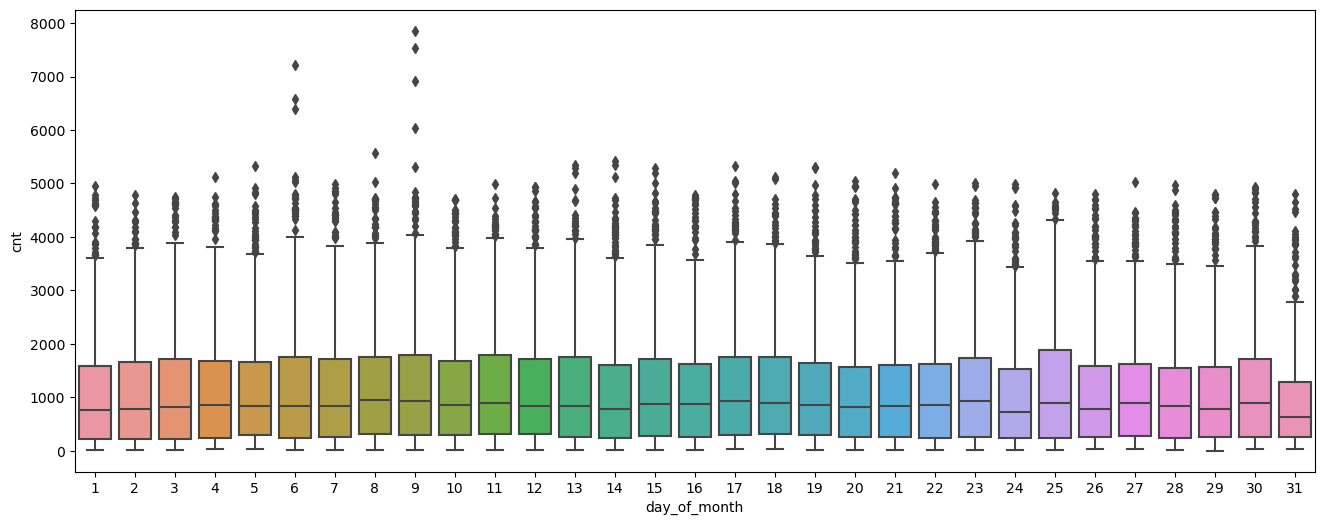

In [21]:
# Plot
plt.figure(figsize=(16,6))
sns.boxplot(data=df,x=df["day_of_month"],y=df.cnt)
plt.title("day_of_month to count")
plt.show()

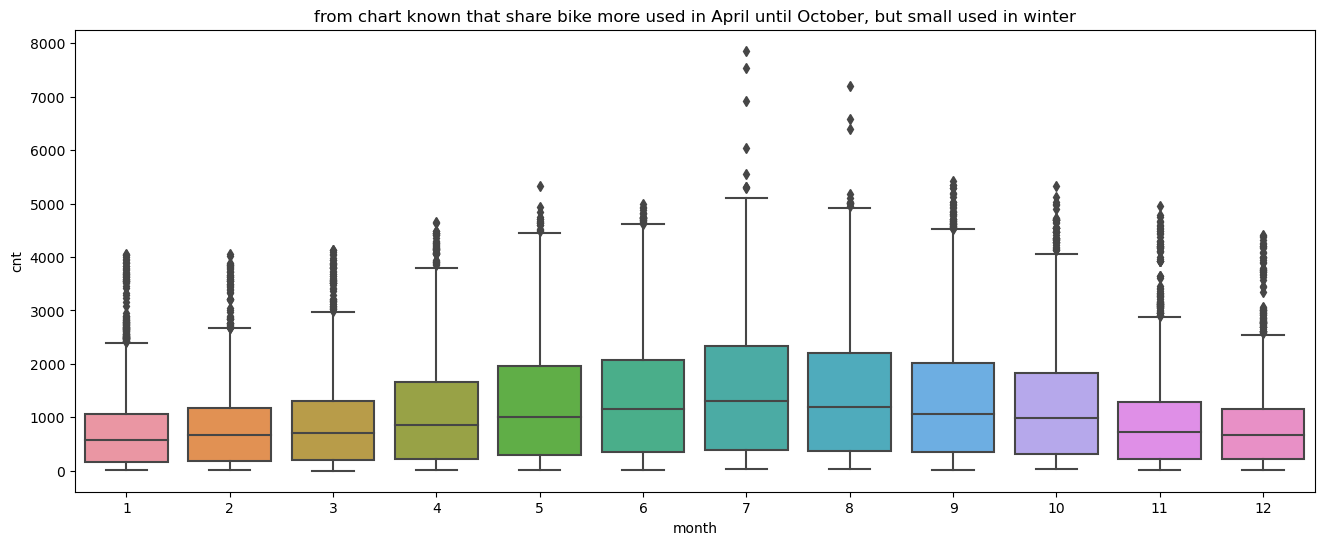

In [22]:
# Plot
plt.figure(figsize=(16,6))
sns.boxplot(data=df,x=df["month"],y=df.cnt)
plt.title("month to count")
plt.show()

Usage is higher from April to October, which is reflected in the higher median (line within the box) and higher IQR. Boxes are lower in winter (December, January, February), indicating reduced use, consistent with the colder weather during these months.

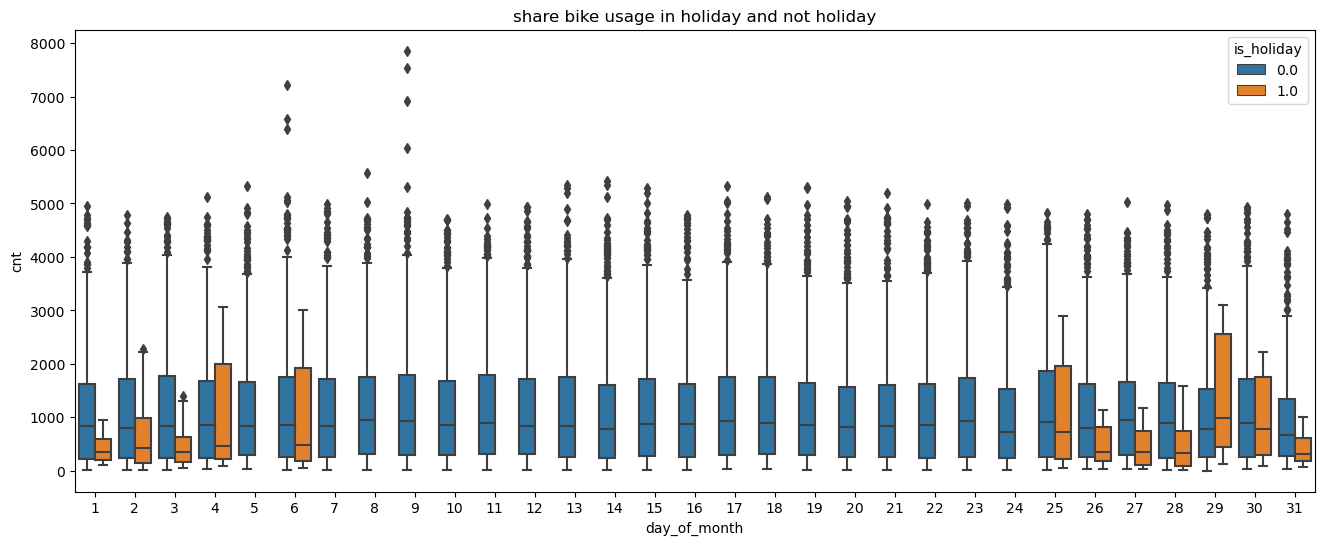

In [23]:
# Plot
plt.figure(figsize=(16,6))
sns.boxplot(data=df,x=df["day_of_month"],y=df.cnt,hue=df["is_holiday"])
plt.title("share bike usage in holiday and not holiday")
plt.show()

weather code categorical <br />
<br />
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity<br />
2 = scattered clouds / few clouds<br />
3 = Broken clouds<br />
4 = Cloudy<br />
7 = Rain/ light Rain shower/ Light rain<br />
10 = rain with thunderstorm<br />
26 = snowfall<br />
94 = Freezing Fog<br />

In [24]:
# Weather
df_weather=df.groupby(['weather_code']).sum()

# Sort cnt field in descending order
df_weather=df_weather.sort_values('cnt',ascending=False)
index_str={1.0:'Clear',2.0:'Few Clouds',3.0:'Broken Clouds',4.0:'Cloudy',7.0:'Light rain',10.0:'Rain With Thunderstorm',26.0:'Snowfall',94.0:'Freezing Fog'}
df_weather = df_weather.rename(index=index_str)
df_weather

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
weather_code,,,,,,,,,,,,
Clear,7146847,77425.500000,71746.000000,418206.00,83321.666667,143.0,1679.0,8194.0,70686,96752,18425,39843
Few Clouds,6035580,53719.333333,50019.833333,270219.50,71640.166667,74.0,966.0,5965.0,49848,64059,11463,25963
Broken Clouds,4243887,44368.500000,41290.000000,270732.50,61616.500000,71.0,1101.0,5680.0,40386,54755,10724,23237
Light rain,1526461,25561.500000,23247.000000,176324.00,38675.500000,71.0,632.0,3372.0,24455,34272,6289,13447
Cloudy,929978,15543.000000,14013.000000,117609.25,20537.750000,24.0,563.0,2610.0,14487,23371,4947,10686
Snowfall,15051,313.500000,137.500000,5327.50,1072.000000,1.0,27.0,152.0,446,879,224,197
Rain With Thunderstorm,8168,188.000000,170.500000,1048.00,246.500000,0.0,2.0,10.0,184,217,42,73


In [25]:
# Wind speed
df_wind=df.copy()
for idx in df_wind.index:
  if(df_wind.loc[idx]['wind_speed']>=0) & (df_wind.loc[idx]['wind_speed']<=8.0):
    df_wind.loc[idx,'wind_speed']=1
  elif(df_wind.loc[idx]['wind_speed']>8.0) & (df_wind.loc[idx]['wind_speed']<=24.0):
    df_wind.loc[idx,'wind_speed']=2
  elif(df_wind.loc[idx]['wind_speed']>24.0) & (df_wind.loc[idx]['wind_speed']<=32.0):
    df_wind.loc[idx,'wind_speed']=3
  elif(df_wind.loc[idx]['wind_speed']>32.0):
    df_wind.loc[idx,'wind_speed']=4

df['wind_speed_1']=df_wind['wind_speed']

df_wind=df_wind.groupby(['wind_speed']).sum()
# Sort cnt field in descending order
df_wind=df_wind.sort_values('cnt',ascending=False)
index_str={1:'0<=wind_speed<=8',2:'8<wind_speed<=24',3:'24<wind_speed<=32',4:'32<wind_speed'}
df_wind = df_wind.rename(index=index_str)
df_wind

,cnt,t1,t2,hum,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
wind_speed,,,,,,,,,,,,
8<wind_speed<=24,13977875,148997.000000,137138.000000,834001.00,31375.0,273.0,3209.0,16624.0,136878,183592,34857,75697
0<=wind_speed<=8,2885758,36027.833333,34432.333333,263400.50,8056.0,63.0,973.0,5270.0,32313,52413,9772,23040
24<wind_speed<=32,2487349,25349.000000,22971.000000,125663.75,5875.0,33.0,605.0,3085.0,24304,30082,5939,11793
32<wind_speed,554990,6745.500000,6082.500000,36401.50,2108.0,15.0,183.0,1004.0,6997,8218,1546,2916


In [26]:
# Humidity
df_hum=df.copy()
for idx in df_hum.index:
  if(df_hum.loc[idx]['hum']>=20.0) & (df_hum.loc[idx]['hum']<=44.0):
    df_hum.loc[idx,'hum']=1
  elif(df_hum.loc[idx]['hum']>44.0) & (df_hum.loc[idx]['hum']<=58.0):
    df_hum.loc[idx,'hum']=2
  elif(df_hum.loc[idx]['hum']>58.0) & (df_hum.loc[idx]['hum']<=86.0):
    df_hum.loc[idx,'hum']=3
  elif(df_hum.loc[idx]['hum']>86.0):
    df_hum.loc[idx,'hum']=4

df['hum_1']=df_hum['hum']

df_hum=df_hum.groupby(['hum']).sum()
# Sort cnt field in descending order
df_hum=df_hum.sort_values('cnt',ascending=False)
index_str={1:'20<=hum<=44',2:'44<hum<=58',3:'58<hum<=86',4:'86<hum'}
df_hum = df_hum.rename(index=index_str)
df_hum

,cnt,t1,t2,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month,wind_speed_1
hum,,,,,,,,,,,,,
58<hum<=86,11511612,132707.000000,121180.500000,181483.416667,28870.0,240.0,3158.0,17119.0,125122,175128,33255,71627,22314.0
44<hum<=58,4550463,38562.000000,37255.000000,44865.500000,4445.0,37.0,623.0,2334.0,34972,38296,6994,14245,5190.0
86<hum,1992518,30988.833333,27546.833333,37246.166667,13183.0,97.0,984.0,6054.0,28947,49018,9664,23122,5379.0
20<=hum<=44,1851379,14861.500000,14641.500000,13515.000000,916.0,10.0,205.0,476.0,11451,11863,2201,4452,1601.0


Text(0.5, 1.0, 'Counts by Humidity')

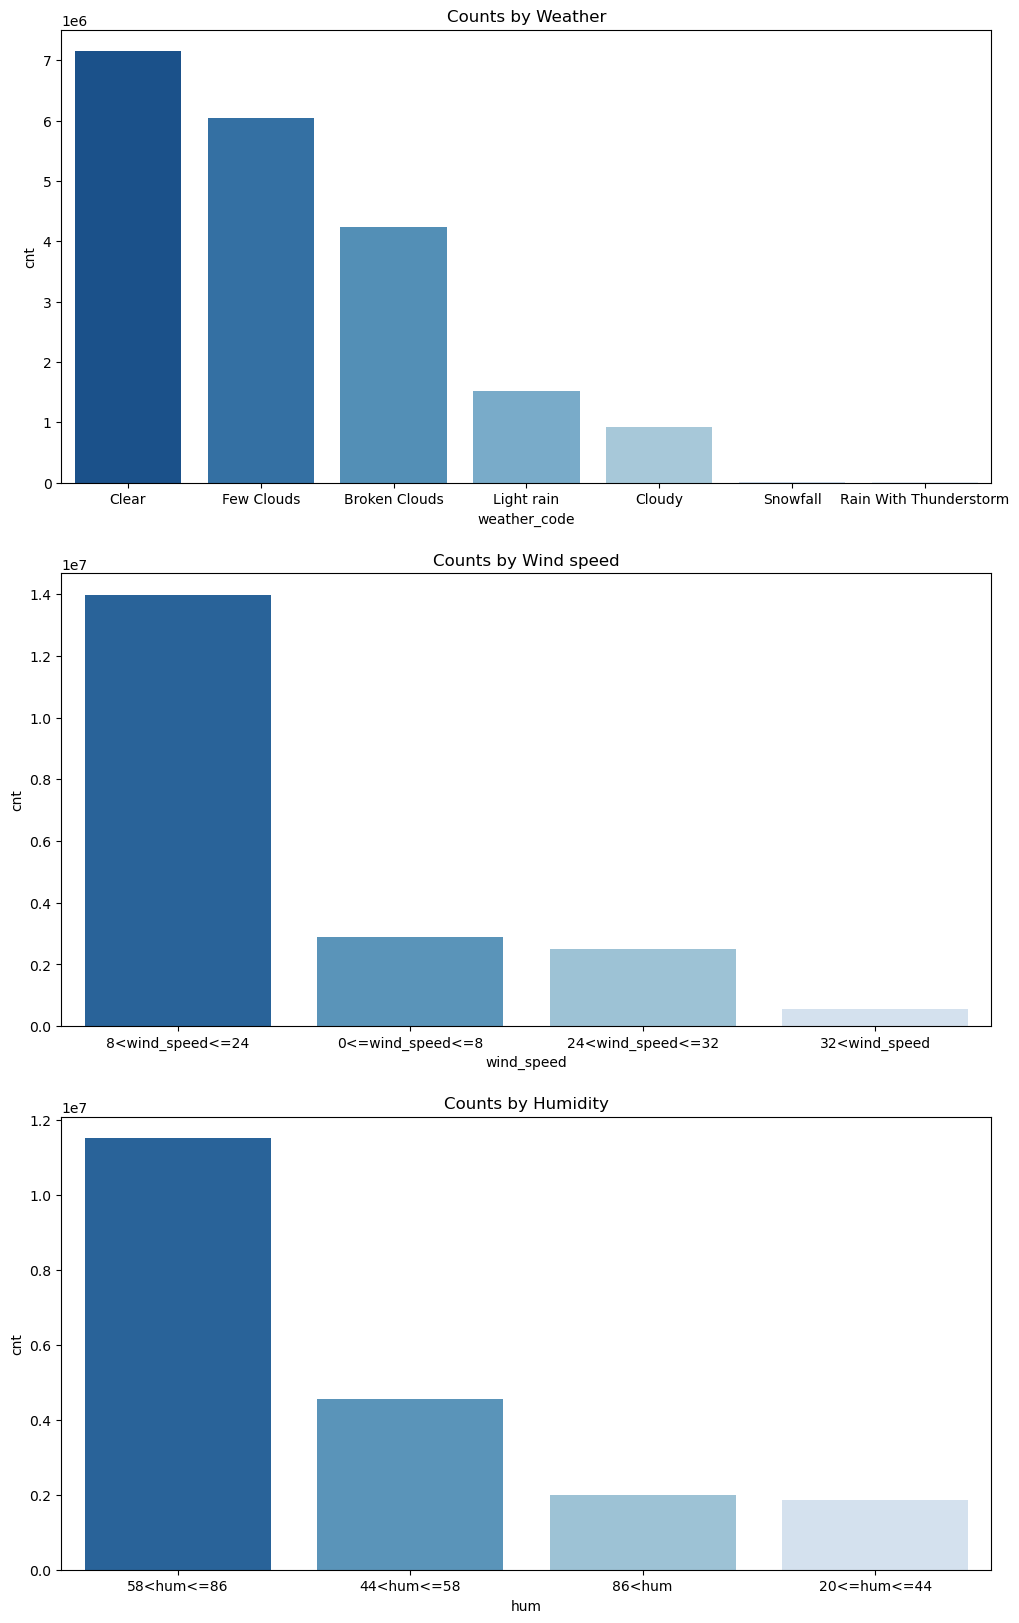

In [27]:
# Plot weather, wind speed and humidity vs. count
fig,(ax1, ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(12, 20)

sns.barplot(data=df_weather,x=df_weather.index,y='cnt',palette="Blues_r",ax=ax1)
sns.barplot(data=df_wind,x=df_wind.index,y='cnt',palette="Blues_r",ax=ax2)
sns.barplot(data=df_hum,x=df_hum.index,y='cnt',palette="Blues_r",ax=ax3)
ax1.set_title('Counts by Weather')
ax2.set_title('Counts by Wind speed')
ax3.set_title('Counts by Humidity')

Weather type:<br/>
The highest usage occurs in clear weather, indicating that good weather conditions may encourage more people to use shared bicycles.<br/>
As weather conditions worsen (Few Clouds, Broken Clouds, Light rain, Cloudy), bike usage declines.<br/>
The usage is lowest during snowfall and rain with thunderstorms. Bad weather affects people's willingness to ride.<br/>

Wind speed:<br/>
The least amount of bicycle usage occurs when the wind speed is 0-8 km/h. This may be because this data is for an urban environment, and light wind conditions have little impact on urban cyclists.<br/>
It is used most when the wind speed is 8-24 km/h, because this wind speed does not affect the riding experience.<br/>
As wind speeds increase (24-32 km/h, above 32 km/h), bicycle use decreases and high wind speeds can make riding difficult.<br/>

Humidity:<br/>
Bicycle use is minimal when relative humidity is low (20% ≤ hum ≤ 44%), since too low humidity occurs in very hot or very cold weather conditions.<br/>
The usage is largest when the humidity is high (58% < hum ≤ 86%), because the humidity in this range is more comfortable and more suitable for outdoor activities.<br/>

# Methodology (Machine Learning)

### Library Required (Machine Learning)

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from prettytable import PrettyTable

### Data preprocessing
Before training the machine learning model, the data is first preprocessed. This includes extracting time factors (such as hours, days, weeks, and months) from timestamps, and cleaning the data to remove outliers. In addition, the data was normalized to eliminate the impact of different dimensions on the model and make model training more stable.

In [62]:
# Correlation analysis
df_corr = df[['t1','t2','hum','wind_speed','cnt']]
df_corr = df_corr.corr()
df_corr

,t1,t2,hum,wind_speed,cnt
t1,1.000000,0.988344,-0.447781,0.145471,0.388798
t2,0.988344,1.000000,-0.403495,0.088409,0.369035
hum,-0.447781,-0.403495,1.000000,-0.287789,-0.462901
wind_speed,0.145471,0.088409,-0.287789,1.000000,0.116295
cnt,0.388798,0.369035,-0.462901,0.116295,1.000000


<Axes: >

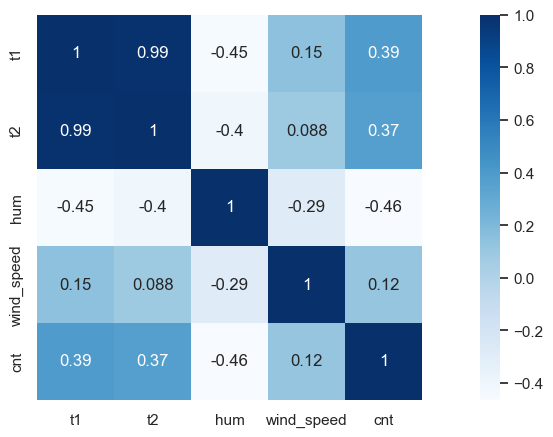

In [66]:
# Plot heatmap 
sns.set(rc = {'figure.figsize':(15,5)})
sns.heatmap(df_corr, 
            annot = True,
            square = True,
            cmap='Blues'
            )

In [116]:
# Drop outliers
dataWithoutOutliers = df[np.abs(df["cnt"] - df["cnt"].mean()) <= (3*df["cnt"].std())]
print(df.shape)
print(dataWithoutOutliers.shape)

(17414, 15)
(17155, 15)


C:\Users\Yicheng Jiang\AppData\Local\Temp\ipykernel_28084\2568396917.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cnt"], ax=axes[0][0],color = "green")
C:\Users\Yicheng Jiang\AppData\Local\Temp\ipykernel_28084\2568396917.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataWithoutO

((array([-3.94199014, -3.72392586, -3.60452017, ...,  3.60452017,
          3.72392586,  3.94199014]),
  array([   0,    9,   10, ..., 4391, 4393, 4395], dtype=int64)),
 (935.4537053816816, 1088.575109297581, 0.9388487540385667))

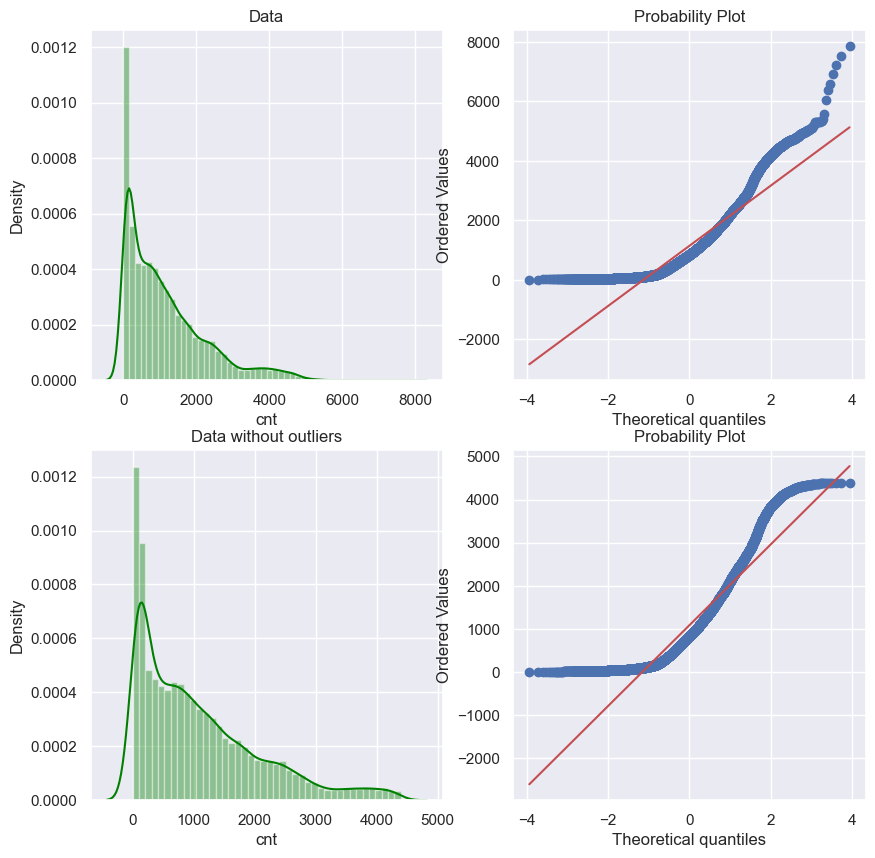

In [122]:
# Plot
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(10, 10)

axes[0,0].set_title('Data')
axes[1,0].set_title('Data without outliers')
sns.distplot(df["cnt"], ax=axes[0][0],color = "green")
stats.probplot(df["cnt"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(dataWithoutOutliers["cnt"], ax=axes[1][0],color = "green")
stats.probplot(dataWithoutOutliers["cnt"], dist='norm', fit=True, plot=axes[1][1])

### Feature selection
Based on the correlation analysis in the data exploration stage, factors such as temperature (actual temperature and perceived temperature), humidity, wind speed, whether it is a holiday, whether it is a weekend, and season were selected as features. These factors are considered to be significantly related to the usage of shared bicycles.<br/>

The correlation between t1 and t2 is very high, so humidity and temperature can be removed, and there is a good correlation with counting humidity: t1

In [118]:
# Select useful features
df_ml = dataWithoutOutliers
df_ml = df_ml.drop(columns=['t2','weather_code','wind_speed_1','hum_1'])
df_ml.head()

,cnt,t1,hum,wind_speed,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,93.0,6.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,93.0,5.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,96.5,0.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,100.0,0.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,93.0,6.5,0.0,1.0,3.0,4,4,6,1


### Splite data into train and test

In [119]:
# Data(X) and Label(y)
y = df_ml['cnt']
X = df_ml.drop(['cnt'],axis=1)

# Normalize the data
X_norm = preprocessing.normalize(df_ml)
print(y)
print(X_norm)

timestamp
2015-01-04 00:00:00     182
2015-01-04 01:00:00     138
2015-01-04 02:00:00     134
2015-01-04 03:00:00      72
2015-01-04 04:00:00      47
                       ... 
2017-01-03 19:00:00    1042
2017-01-03 20:00:00     541
2017-01-03 21:00:00     337
2017-01-03 22:00:00     224
2017-01-03 23:00:00     139
Name: cnt, Length: 17155, dtype: int64
[[0.88932984 0.01465928 0.45443778 ... 0.01954571 0.02931857 0.00488643]
 [0.82780301 0.01799572 0.55786724 ... 0.02399429 0.03599144 0.00599857]
 [0.81038917 0.0151192  0.58360116 ... 0.02419072 0.03628608 0.00604768]
 ...
 [0.96961456 0.01582457 0.22585977 ... 0.00863158 0.00287719 0.00287719]
 [0.93810727 0.02303388 0.3182864  ... 0.01256394 0.00418798 0.00418798]
 [0.85948329 0.03091667 0.46993331 ... 0.01855    0.00618333 0.00618333]]


In [120]:
# Split the data into training set and test set with the ratio of 7:3
x_train, x_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12008, 11)
(5147, 11)
(12008,)
(5147,)


### Model building:
Linear Regression: <br/>
This is a basic prediction model used to evaluate the linear relationship between features and shared bicycle usage.<br/>

Decision Tree Regressor: <br/>
This model predicts outcomes by learning decision rules in the data and is suitable for handling non-linear relationships.<br/>

Random Forest Regressor: <br/>
As a type of ensemble learning, random forest constructs multiple decision trees and outputs an average prediction result, which usually has higher accuracy and robustness.<br/>


In [121]:
table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "R² score","Mean Absolute Error"]
models = [
LinearRegression(),
DecisionTreeRegressor(random_state = 66),
RandomForestRegressor( random_state = 66, n_estimators=300),
]

for model in models:
    model.fit(x_train, y_train)
    y_res = model.predict(x_test)
    mse = mean_squared_error(y_test, y_res)
    score = model.score(x_test, y_test)
    mae = mean_absolute_error(y_test,y_res)
    table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f'),format(mae, '.2f')])
print(table)

+-----------------------+--------------------+----------+---------------------+
|         Model         | Mean Squared Error | R² score | Mean Absolute Error |
+-----------------------+--------------------+----------+---------------------+
|    LinearRegression   |     369228.92      |   0.61   |        467.73       |
| DecisionTreeRegressor |      8908.20       |   0.99   |        39.86        |
| RandomForestRegressor |      3951.33       |   1.00   |        30.07        |
+-----------------------+--------------------+----------+---------------------+


# Result and Discussion

The results show that the random forest regressor performed best on all evaluation metrics, followed by the decision tree regressor, and the linear regression model performed the worst.<br/>

Model performance:<br/>
1. The linear regression model provided a baseline with a mean squared error of 369228.92, an R² score of 0.61, and a mean absolute error of 519.37. Although linear models are easy to understand and implement, they may not be accurate enough when dealing with complex nonlinear relationships.<br/>

2. The decision tree regressor significantly improved prediction accuracy, with the mean squared error down to 8908.20, an R² score of 0.99, and a mean absolute error of 37.66. This shows that decision trees are better able to capture non-linear patterns in the data.<br/>

3. The Random Forest Regressor provided the best prediction performance, with a further reduction in mean squared error to 3951.33, an R² score of perfect 1.00, and a mean absolute error of 29.85. Random forest reduces the risk of overfitting and improves the stability and generalization ability of the model by integrating multiple decision trees.<br/>

The random forest regressor became the most suitable model for predicting bike-sharing demand in this study due to its high flexibility and ability to maintain stability when dealing with various data characteristics. Decision trees and random forests can better handle the nonlinear relationships and complex interactions of data, which are difficult to achieve with linear models.<br/>

Furthermore, the model’s high R² score and low error metric indicate that selected features, such as weather conditions, time factors, and holidays, are crucial for predicting shared bike usage. In practical applications, it is believed that through refined management and optimization of the configuration of shared bicycle stations, the efficiency of the system and user satisfaction can be further improved.<br/>

# Conclusion

This project investigates the usage patterns of London's electric bike-sharing system, specifically in relation to varying weather conditions and time periods, by utilising comprehensive data analysis and machine learning models. Through the examination of hourly shared bike usage data spanning the previous two years, we discovered that weather patterns, daytime events (like weekends and holidays), and seasonal variations significantly affect bike usage.<br/>

The machine learning section demonstrates that the linear regression model performs relatively poorly, while the random forest regressor outperforms all other models and accurately predicts bicycle usage demand. The decision tree regressor is the next best performer. This finding emphasises the need for high-complexity models in traffic demand forecasting.<br/>

The findings of this project demonstrate that both the quality of life for locals and the effectiveness of urban transportation can be enhanced by optimising the design and administration of shared bicycle systems. The potential of shared electric bicycles as a low-carbon mode of transportation cannot be overlooked, particularly in light of the issues with urban congestion and environmental pollution.<br/>



# Reference List

Chibwe, J., Heydari, S., Faghih Imani, A. and Scurtu, A. (2023). An exploratory analysis of the trend in the demand for the London bike-sharing system: from London Olympics to Covid-19 pandemic. University of Southampton; Imperial College London.<br/>

Heydari, S., Chibwe, J., Faghih Imani, A. & Scurtu, A. (2023). An exploratory analysis of the trend in the demand for the London bike-sharing system: from London Olympics to Covid-19 pandemic.<br/>

Rylander, F., Peng, B. & Wheeler, J. (2023). Bike Share Usage Prediction in London.<br/>

Warlina, L. and Hermawan, Y.A. (2020). Smart Bike Sharing System as Sustainable Transportation. IOP Conference Series: Materials Science and Engineering, 879, p.012153. DOI: 10.1088/1757-899X/879/1/012153.<br/>